# 0.0. Understanding the problem

--Goal:
    --1.0 Predict the first destination that the new user will choose
    
    --Why?
        --What is the business model of Airbnb?
            --Marketplace (connect people who offer acomodation to whom are seeking a place)
            --Offer
                --Portfolio size
                --Portfolio diversity and density
                --Average price
                
            --Demand
                --Number of users
                --LTV (lifetime value)
                --CAC (client acquisition cost)
                
                Gross Revenue = (Fee*Number of clients) - CAC
                
--Solution
    --Predictive model for the first destination of new user
    --1.0 Prediction save in a database
    --2.0 API
        --Input: User and features
        --Output: User and feature with destination prediction
        

# Module 1

## 0.0. Imports

### 0.1. Helper Functions

In [68]:
!pip install keras
!pip install tensorflow
!pip install scikit-plot

In [69]:
import pandas as pd

from sklearn    import metrics         as m
from sklearn    import model_selection as ms
from sklearn    import preprocessing   as pp
from scikitplot import metrics         as mt

from keras import models as ml
from keras import layers as l

### 0.2. Loading Data

In [47]:
df_raw = pd.read_csv('dataset/train_users_2.csv', low_memory=True)
df_raw.shape

(213451, 16)

In [48]:
#df_sessions = pd.read_csv('dataset/sessions.csv', low_memory=True)
#df_sessions.shape

# 1.0. Data Description

In [49]:
df1 = df_raw.copy()

In [50]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 213451
Number of columns: 16


## 1.1. Data Type

In [51]:
df1.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

## 1.2. NA Check

In [52]:
df1.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [53]:
#remove missing data
df1 = df1.dropna()
df1.shape

(68171, 16)

## 1.3. Change Data Type

In [54]:
#date_account_created
df1['date_account_created'] = pd.to_datetime(df1['date_account_created'])

#timestamp_first_active
df1['timestamp_first_active'] = pd.to_datetime(df1['timestamp_first_active'], format='%Y%m%d%H%M%S')

#date_first_booking
df1['date_first_booking'] = pd.to_datetime(df1['date_first_booking'])

#age
df1['age'] = df1['age'].astype(int)

## 1.4. Change Balanced Data

In [55]:
df1['country_destination'].value_counts(normalize=True)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

# 2.0. 

In [56]:
df2 = df1.copy()

## 2.1. Filtering Rows

## 2.2. Columns Selection

# 3.0. Data Preparation

In [57]:
df3 = df2.copy()

In [58]:
#dummy variable
df3_dummy = pd.get_dummies(df3.drop(['id','country_destination'], axis=1))

#join id and country destination
df3 = pd.concat([df3[['id','country_destination']], df3_dummy], axis=1)

# 4.0. Feature Seleciotn

In [59]:
cols_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking']
df4 = df3.drop(cols_drop, axis=1)

# 5.0. Machine Learning

In [60]:
X = df4.drop(['id', 'country_destination'], axis=1)
y = df4['country_destination'].copy()

In [61]:
#split dataset into train and test
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=32)

In [62]:
ohe = pp.OneHotEncoder()
y_train_nn = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()

In [64]:
#model definition
model = ml.Sequential()
model.add(l.Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(l.Dense(11, activation='softmax'))

#model compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train_nn, epochs=100)

Epoch 1/100
1705/1705 [==============================] - 5s 1ms/step - loss: 1.3882 - accuracy: 0.6928
Epoch 2/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2738 - accuracy: 0.7054
Epoch 3/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2317 - accuracy: 0.7112
Epoch 4/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2080 - accuracy: 0.7099
Epoch 5/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1943 - accuracy: 0.7090
Epoch 6/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1828 - accuracy: 0.7082
Epoch 7/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1601 - accuracy: 0.7101
Epoch 8/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1524 - accuracy: 0.7080
Epoch 9/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1492 - accuracy: 0.7073
Epoch 10/100
1705/1705 [==============================] - 2s 1ms/step - l

1705/1705 [==============================] - 2s 1ms/step - loss: 1.1012 - accuracy: 0.7099
Epoch 80/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1073 - accuracy: 0.7090
Epoch 81/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1033 - accuracy: 0.7095
Epoch 82/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0993 - accuracy: 0.7112
Epoch 83/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0876 - accuracy: 0.7161
Epoch 84/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1006 - accuracy: 0.7106
Epoch 85/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0912 - accuracy: 0.7146
Epoch 86/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1004 - accuracy: 0.7107
Epoch 87/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0954 - accuracy: 0.7118
Epoch 88/100
1705/1705 [==============================] - 2s 1ms/step - loss:

# 5.0. NN Performance

In [70]:
#prediction
pred_nn = model.predict(X_test)

#invert prediction
yhat_nn = ohe.inverse_transform(pred_nn)

#prediction prepare
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape(1, -1)[0]

Accuracy: 0.7037037037037037


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

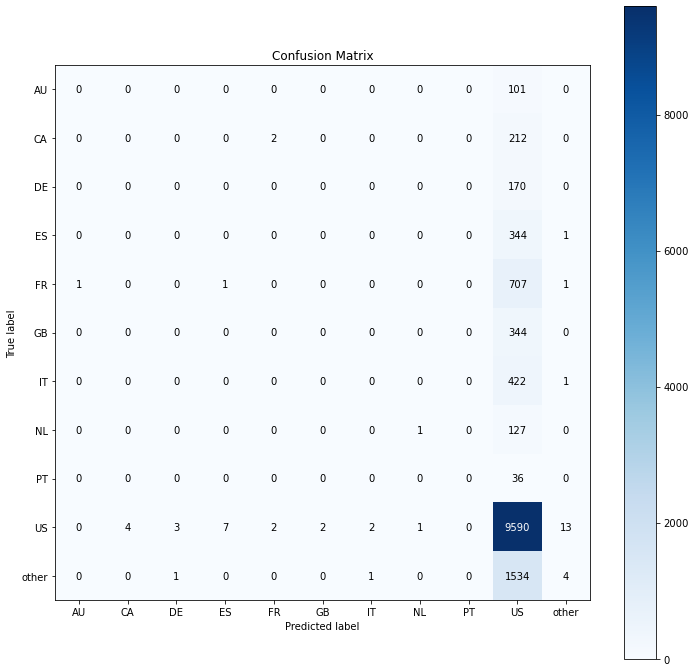

In [71]:
#accuracy
acc_nn = m.accuracy_score(y_test_nn, yhat_nn)
print('Accuracy: {}'.format(acc_nn))

#confusion matrix
mt.plot_confusion_matrix(y_test_nn, yhat_nn, normalize=False, figsize=(12,12))